# STA 141B: Homework 3
Winter 2018

# E-Shen Wu

## Instructions

We use a script that extracts your answers by looking for cells in between the cells containing the exercise statements.  So you 

- MUST add cells in between the exercise statements and add answers within them and
- MUST NOT modify the existing cells, particularly not the problem statement

To make markdown, please switch the cell type to markdown (from code) - you can hit 'm' when you are in command mode - and use the markdown language.  For a brief tutorial see: https://daringfireball.net/projects/markdown/syntax


## Fruits and Veggies

The US Department of Agriculture publishes price estimates for fruits and vegetables [online](https://www.ers.usda.gov/data-products/fruit-and-vegetable-prices/fruit-and-vegetable-prices/). The most recent estimates are based on a 2013 survey of US retail stores.

The estimates are provided as a collection of MS Excel files, with one file per fruit or vegetable. The `assignment3_data.zip` file contains the fruit and vegetable files in the directories `fruit` and `vegetables`, respectively.

__Exercise 1.1.__ Use pandas to extract the "Fresh" row(s) from the <strong style="color:#B0B">fruit</strong> Excel files. Combine the data into a single data frame. Your data frame should look something like this:

type       | food       | form   | price_per_lb | yield | lb_per_cup | price_per_cup
---------- | ---------- | ------ | ------------ | ----- | ---------- | -------------
fruit      | watermelon | Fresh1 | 0.333412     | 0.52  | 0.330693   | 0.212033
fruit      | cantaloupe | Fresh1 | 0.535874     | 0.51  | 0.374786   | 0.3938
vegetables | onions     | Fresh1 | 1.03811      | 0.9   | 0.35274    | 0.406868
...        |            |        |              |       |            |


It's okay if the rows and columns of your data frame are in a different order. These modules are especially relevant:

* [`str` methods](https://docs.python.org/2/library/stdtypes.html#string-methods)
* [`os`](https://docs.python.org/2/library/os.html)
* [`os.path`](https://docs.python.org/2/library/os.path.html)
* [pandas](http://pandas.pydata.org/pandas-docs/stable/): `read_excel()`, `concat()`, `.fillna()`, `.str`, plotting methods

Ask questions and search the documentation/web to find the functions you need.


In [1]:
import os
cwd = os.getcwd()
cwd
os.chdir("/Users/foxeshen/OneDrive - g.ntu.edu.tw/141BHW/141b-hw3-foxeshen/assignment3_data/fruit")
#print(os.listdir('.'))
import pandas as pd
import numpy as np
import glob
glob.glob("/Users/foxeshen/OneDrive - g.ntu.edu.tw/141BHW/141b-hw3-foxeshen/assignment3_data/fruit/*.xlsx")

all_data = pd.DataFrame()
for f in glob.glob("/Users/foxeshen/OneDrive - g.ntu.edu.tw/141BHW/141b-hw3-foxeshen/assignment3_data/fruit/*.xlsx"):
    df = pd.read_excel(f,header=None)
    name = df.iloc[0,0].split("—")
    df = df.loc[df[0].str.contains("Fresh", na=False)]
    df['a'] = name[0]
    all_data = all_data.append(df,ignore_index=True)   
all_data.drop(all_data.columns[[2,5,8,9]], axis=1, inplace=True)
all_data.columns= ['form', 'price_per_lb','yield','lb_per_cup','price_per_cup','food']
all_data['type']='fruit'
all_data = all_data[[ 'type','food','form', 'price_per_lb', 'yield', 'lb_per_cup', 'price_per_cup']]
all_data

,type,food,form,price_per_lb,yield,lb_per_cup,price_per_cup
0,fruit,Cherries,Fresh1,3.59299,0.92,0.341717,1.334548
1,fruit,Tangerines,Fresh1,1.377962,0.74,0.407855,0.759471
2,fruit,Oranges,Fresh1,1.035173,0.73,0.407855,0.578357
3,fruit,Blackberries,Fresh1,5.774708,0.96,0.31967,1.922919
4,fruit,Apricots,Fresh1,3.040072,0.93,0.363763,1.189102
5,fruit,Papaya,Fresh1,1.298012,0.62,0.308647,0.646174
6,fruit,Raspberries,Fresh1,6.975811,0.96,0.31967,2.322874
7,fruit,Pineapple,Fresh1,0.627662,0.51,0.363763,0.447686
8,fruit,Peaches,Fresh1,1.591187,0.96,0.341717,0.56639
9,fruit,Plums,Fresh1,1.827416,0.94,0.363763,0.707176


__Exercise 1.2.__ Reuse your code from exercise 1.1 to extract the "Fresh" row(s) from the <strong style="color:#B0B">vegetable</strong> Excel files.

Does your code produce the correct prices for tomatoes? If not, why not? Do any other files have the same problem as the tomatoes file?

You don't need to extract the prices for these problem files. However, make sure the prices are extracted for files like asparagus that don't have this problem.

In [2]:
import os
cwd = os.getcwd()
cwd
os.chdir("/Users/foxeshen/OneDrive - g.ntu.edu.tw/141BHW/141b-hw3-foxeshen/assignment3_data/vegetables")
#print(os.listdir('.'))
import pandas as pd
import numpy as np
import glob
glob.glob("/Users/foxeshen/OneDrive - g.ntu.edu.tw/141BHW/141b-hw3-foxeshen/assignment3_data/vegetables/*.xlsx")

all_data1 = pd.DataFrame()
for f in glob.glob("/Users/foxeshen/OneDrive - g.ntu.edu.tw/141BHW/141b-hw3-foxeshen/assignment3_data/vegetables/*.xlsx"):
    df = pd.read_excel(f,header=None)
    df = df.fillna(0)
    name = df.iloc[0,0].split("—")
    df = df.loc[df[0].str.contains("Fresh", na=False)]
    df['a'] = name[0]
    all_data1 = all_data1.append(df,ignore_index=True)   
all_data1.drop(all_data1.columns[[2,5,8,9]], axis=1, inplace=True)
all_data1.columns= ['form', 'price_per_lb','yield','lb_per_cup','price_per_cup','food']
all_data1['type']='vegetables'
all_data1 = all_data1[['type', 'food','form', 'price_per_lb', 'yield', 'lb_per_cup', 'price_per_cup']]
all_data1

,type,food,form,price_per_lb,yield,lb_per_cup,price_per_cup
0,vegetables,Turnip greens,Fresh1,2.471749,0.75,0.31967,1.053526
1,vegetables,Artichoke,Fresh1,2.21305,0.375309,0.385809,2.274967
2,vegetables,Acorn squash,Fresh1,1.172248,0.458554,0.451948,1.15536
3,vegetables,Celery,Fresh1,0,0,0,0
4,vegetables,Cucumbers,"Fresh, consumed with peel1",1.295931,0.97,0.264555,0.353448
5,vegetables,Cucumbers,"Fresh, peeled1",1.295931,0.73,0.264555,0.46965
6,vegetables,Kale,Fresh1,2.807302,1.05,0.286601,0.766262
7,vegetables,Sweet corn,Fresh1,2.690623,0.54,0.363763,1.812497
8,vegetables,Mushrooms,Fresh1,0,0,0,0
9,vegetables,Collard greens,Fresh1,2.630838,1.16,0.286601,0.650001


No.
It can be showed below(tomatoes file), the fourth row which starting by "Fresh" contains no numeric data.
So, when we extract the "Fresh" rows from this file, it displays NaN in following columns.
Yes, such as Celery, Mushrooms, broccoli, Carrots, Cauliflower, Romaine lettuce, Spinach. 

In [5]:
example = pd.read_excel("/Users/foxeshen/OneDrive - g.ntu.edu.tw/141BHW/141b-hw3-foxeshen/assignment3_data/vegetables/tomatoes.xlsx",header=None)
example

,0,1,2,3,4,5,6
0,Tomatoes—Average retail price per pound and pe...,NaN,NaN,NaN,NaN,NaN,NaN
1,Form,Average retail price,NaN,Preparation,Size of a,NaN,Average price
2,NaN,NaN,NaN,yield factor,cup equivalent,NaN,per cup equivalent
3,Fresh,NaN,NaN,NaN,NaN,NaN,NaN
4,"Grape and cherry1,2",3.28896,per pound,0.91,0.374786,pounds,1.354567
5,"Roma1,3",1.243417,per pound,0.91,0.374786,pounds,0.512105
6,"Beefsteak1,4",3.159212,per pound,0.91,0.374786,pounds,1.30113
7,Canned5,0.924836,per pound,1,0.540133,pounds,0.499534
8,"1Includes greenhouse, hydroponic, and field-gr...",NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN


__Exercise 1.3.__ Remove rows without a price from the vegetable data frame and then combine the fruit and vegetable data frames. Make sure all columns of numbers are numeric (not strings).

In [6]:
import numpy 
new_first = all_data.copy()
new_second = all_data1.copy()
new_second = new_second.drop([3,8,11,16,20,21,23,30])
new_first = new_first.append(new_second,ignore_index=True)   
new_first

,type,food,form,price_per_lb,yield,lb_per_cup,price_per_cup
0,fruit,Cherries,Fresh1,3.59299,0.92,0.341717,1.334548
1,fruit,Tangerines,Fresh1,1.377962,0.74,0.407855,0.759471
2,fruit,Oranges,Fresh1,1.035173,0.73,0.407855,0.578357
3,fruit,Blackberries,Fresh1,5.774708,0.96,0.31967,1.922919
4,fruit,Apricots,Fresh1,3.040072,0.93,0.363763,1.189102
5,fruit,Papaya,Fresh1,1.298012,0.62,0.308647,0.646174
6,fruit,Raspberries,Fresh1,6.975811,0.96,0.31967,2.322874
7,fruit,Pineapple,Fresh1,0.627662,0.51,0.363763,0.447686
8,fruit,Peaches,Fresh1,1.591187,0.96,0.341717,0.56639
9,fruit,Plums,Fresh1,1.827416,0.94,0.363763,0.707176


__Exercise 1.4.__ Discuss the questions below (a paragraph each is sufficient). Use plots to support your ideas.

* What kinds of fruits are the most expensive (per pound)? What kinds are the least expensive?
* How do the price distributions compare for fruit and vegetables?
* Which foods are the best value for the price?
* What's something surprising about this data set?
* Which foods do you expect to provide the best combination of price, yield, and nutrition? A future assignment may combine this data set with another so you can check your hypothesis.

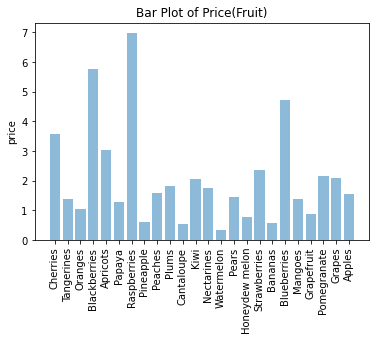

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
#import plotnine as gg
import seaborn as sns
new_first_fruit = new_first[0:24]
objects =new_first_fruit['food']
y_pos = np.arange(len(objects))
performance = new_first_fruit['price_per_lb'] 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('price')
plt.title('Bar Plot of Price(Fruit)')
plt.xticks(rotation=90)
plt.show()
#Raspberries are the most expensive. 
#Watermelon is the least expensive.

/Users/foxeshen/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/foxeshen/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/Users/foxeshen/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWa

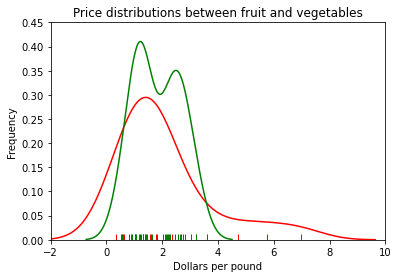

In [27]:
import seaborn as sns
df1_4 = new_first[0:24]
df1_4_1 = new_first[24:49]

F = sns.distplot(df1_4.loc[:,'price_per_lb'], hist=False, rug=True, color ='r',label="Fruit")
V = sns.distplot(df1_4_1.loc[:,'price_per_lb'], hist=False, rug=True, color ='g',label="Veggetables")
V.set(xlim=(-2,10), ylim=(0, 0.45))
V.set(title= "Price distributions between fruit and vegetables",xlabel='Dollars per pound', ylabel='Frequency')
plt.show()

In [28]:
#Best "value for price" means which gives you the most food for how much you pay. By TA Nick.
#So the best value for price would be the minimum of "price_per_lb / yield"
#In other word, spend the least money buying the most weight of food.
df1_4_3 = new_first.copy()
df1_4_3['Best value for price'] = df1_4_3['price_per_lb'] / df1_4_3['yield']
df1_4_3['Best value for price'].min()
df1_4_3[df1_4_3.iloc[:,7]==df1_4_3['Best value for price'].min()]
#Watermelon is the best value for price.


,type,food,form,price_per_lb,yield,lb_per_cup,price_per_cup,Best value for price
13,fruit,Watermelon,Fresh1,0.333412,0.52,0.330693,0.212033,0.641177


In [29]:
fruit = new_first[new_first['type'] == 'fruit']
vegetables = new_first[new_first['type'] == 'vegetables']
fruit['price_per_lb'].mean()
print(round(fruit['price_per_lb'].mean(),3),round(vegetables['price_per_lb'].mean(),3))
print(round(fruit['price_per_lb'].std(),3),round(vegetables['price_per_lb'].std(),3))

#We can find that the mean of price of fruit is higher than the mean of price of vegetables.
#According to std and plot of distributions, it showed that the dist. of fruit is wider than vegetables'.
#We find that there are some yield of food are bigger than 1. Is it mean that there are more than 100% is edible?

2.077 1.839
1.676 0.817


We know that "price_per_lb" * "lb_per_cup" / "yield" = "price_per_cup"
The best combination of price, yield, and nutrition means that the lowest price_per_cup.
The price_per_cup of Potatoes is the lowest. 